In [1]:
from astroquery.jplhorizons import Horizons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions
import subprocess
import os
import time

"""object = 'Astraea'
start_date = '2024-01-01'
end_date = '2024-06-30'
step = '3d'
obs_code = 995"""

"""eph = Horizons(id=f'{object}', location = '995', epochs = {'start':f'{start_date}', 'stop':f'{end_date}', 'step': '3d'}).ephemerides(quantities = 1)
print(eph)"""

"""#get_jpl_elements
elements = Horizons(id=f'{object}', location = '500@10').elements()
print(elements.columns)
jpl_eccentricity = elements['e'][0]
jpl_sma = elements['a'][0]
jpl_period = str(float(elements['P'][0])/365.25)
jpl_peri_dist = elements['q'][0]
jpl_apogee_dist = elements['Q'][0]
jpl_peri_arg = elements['w'][0]
jpl_asc_node = elements['Omega'][0]
jpl_inc = elements['incl'][0]
jpl_elements = np.array([jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist], dtype=np.float64)"""

"#get_jpl_elements\nelements = Horizons(id=f'{object}', location = '500@10').elements()\nprint(elements.columns)\njpl_eccentricity = elements['e'][0]\njpl_sma = elements['a'][0]\njpl_period = str(float(elements['P'][0])/365.25)\njpl_peri_dist = elements['q'][0]\njpl_apogee_dist = elements['Q'][0]\njpl_peri_arg = elements['w'][0]\njpl_asc_node = elements['Omega'][0]\njpl_inc = elements['incl'][0]\njpl_elements = np.array([jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist], dtype=np.float64)"

Object and observatory details

In [2]:
object = 'Astraea'
start_date = '2024-01-01'
end_date = '2024-06-30'
step = '3d'
obs_code = 995

Import Horizons data

In [3]:
eph = functions.get_jpl_ephemeris(object, obs_code, start_date, end_date, step)
jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist = functions.get_jpl_elements(object)
jpl_elements = np.array([jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist], dtype=np.float64)

Plot difference between JPL Horizons orbital elements and those returned by find_orb for the JPL Horizons astrometry

2024-Jan-01 00:00
2024 01 01.00000
2024-Jan-04 00:00
2024 01 04.00000
2024-Jan-07 00:00
2024 01 07.00000
2024-Jan-10 00:00
2024 01 10.00000
2024-Jan-13 00:00
2024 01 13.00000
2024-Jan-16 00:00
2024 01 16.00000
2024-Jan-19 00:00
2024 01 19.00000
[-0.00794674 -0.01346953  0.00435963  0.01477736  0.00420023 -0.01837189
 -0.01686686 -0.0111438 ]
7 -0.007946741335955783
7 -0.013469525335342526
7 0.004359627969393984
7 0.014777356280534363
7 0.0042002283069560754
7 -0.018371894803501786
7 -0.01686685762338379
7 -0.01114379600866675
2024-Jan-01 00:00
2024 01 01.00000
2024-Jan-04 00:00
2024 01 04.00000
2024-Jan-07 00:00
2024 01 07.00000
2024-Jan-10 00:00
2024 01 10.00000
2024-Jan-13 00:00
2024 01 13.00000
2024-Jan-16 00:00
2024 01 16.00000
2024-Jan-19 00:00
2024 01 19.00000
2024-Jan-22 00:00
2024 01 22.00000
[-0.00704216 -0.01282373  0.00532819  0.03946093 -0.00083813 -0.01740477
 -0.02190985 -0.006603  ]
8 -0.007042155721455739
8 -0.012823728505061529
8 0.0053281868963621064
8 0.0394609255627

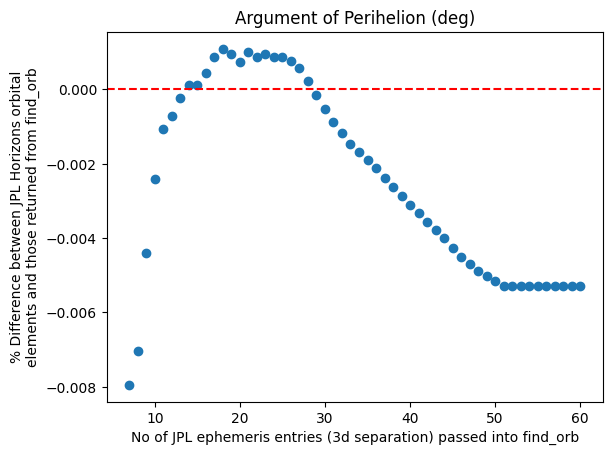

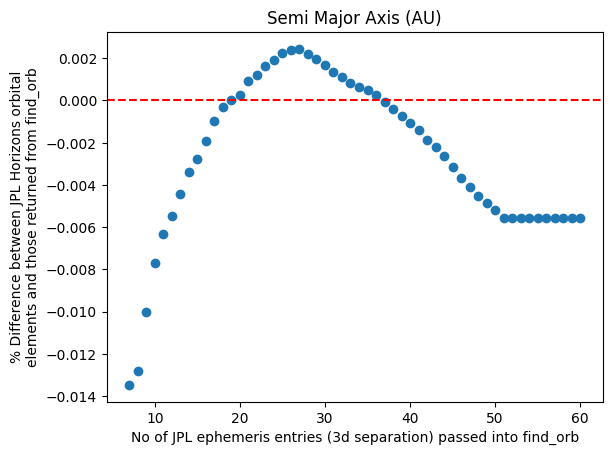

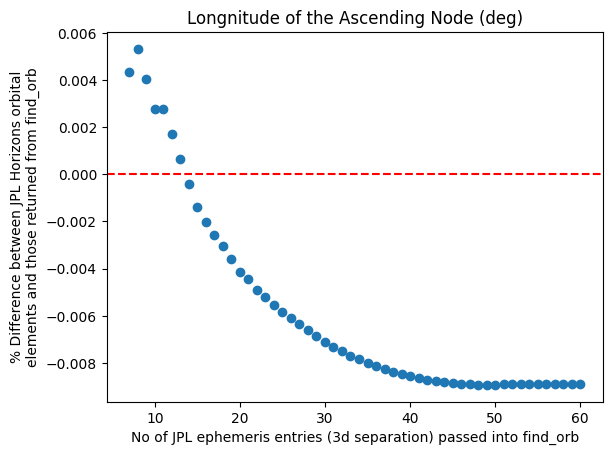

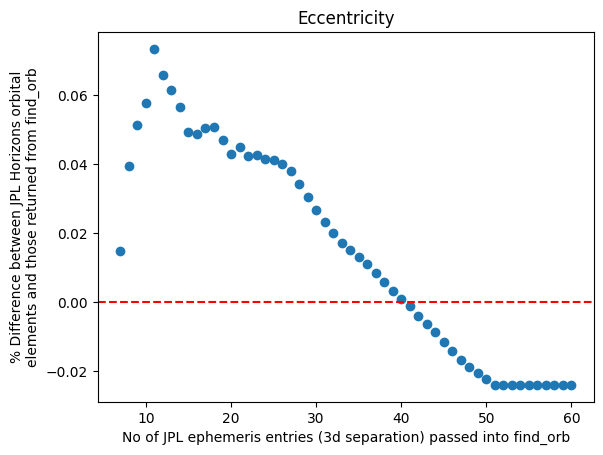

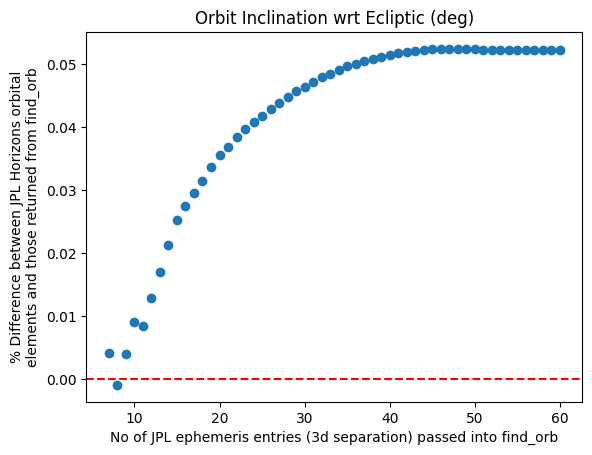

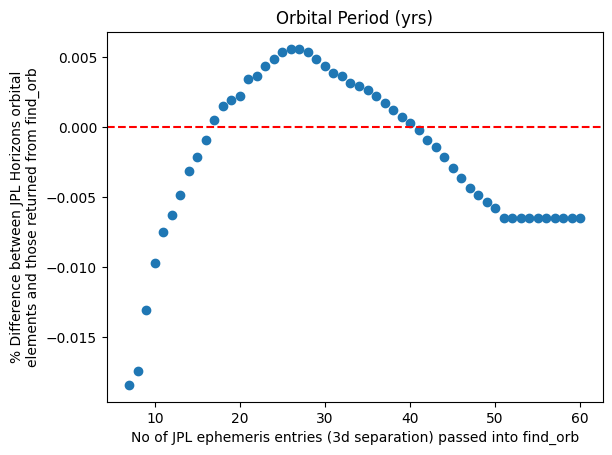

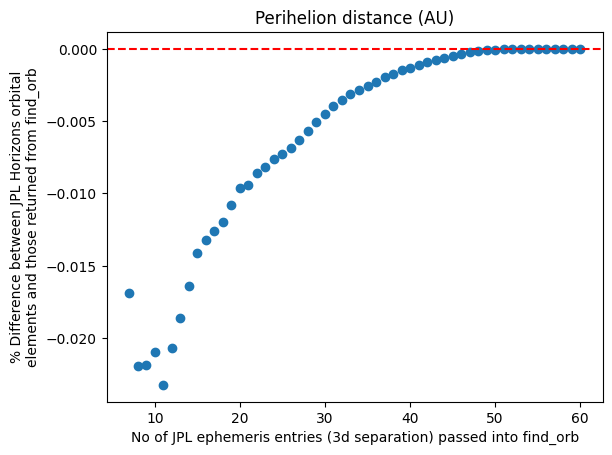

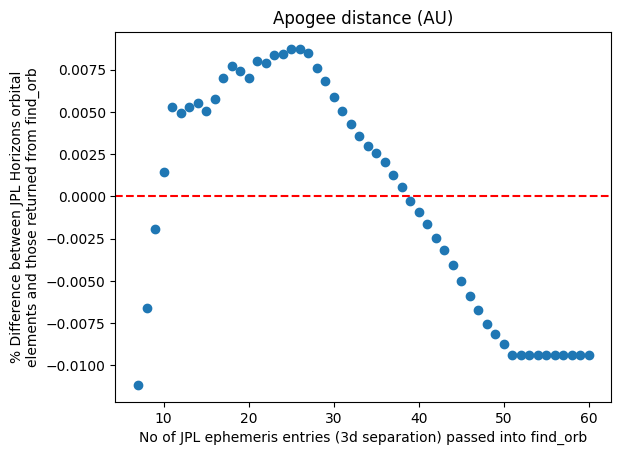

In [4]:
diffs = [[],[],[],[],[],[],[],[]]
no_of_obs = []

for j in range(7, len(eph)):
    object_list = []
    for l in range(0, 12):
        try:
            object_list.append(object[l])
        except:
            object_list.append(' ')
    object_designation = ''.join(map(str, object_list))

    functions.read_jpl_ephemeris(eph, object_designation, obs_code, rows_to_read=j)

    """os.chdir('C:\\Users\\bradl\\.vscode\\advanced_lab')
    f = open("jpl_eph.txt", "w")
    f.writelines(['123456789|123456789|123456789|123456789|123456789|123456789|123456789|123456789|\n', '<-ObjDesig->*nnYYYY MM DD.DDDDD HH MM SS.SSSsdd mm ss.ss<blanks >MM.MMBz<ref>COD\n'])

    for i in range(0, j):
        jpl_date = eph['datetime_str'][i]
        year = jpl_date[0:4]; month = jpl_date[5:8]; day = jpl_date[9:11] + '.' + str(np.round((int(jpl_date[12:14])*3600+int(jpl_date[15:17])*3600)/(24*3600), 5))[2:]
        if len(day) < 8:
            day = day.ljust(8, '0')
        print(jpl_date)
        date = f'{year} {functions.month_to_number(month)} {day}'
        print(date)

        jpl_RA = functions.RA_to_hms(eph['RA'][i]).ljust(11, '0')
        jpl_DEC = functions.dec_to_dms(eph['DEC'][i]).ljust(12, '0')
        RA = f'jpl_RA'

        f.write(f'{object_designation}   {date} {jpl_RA} {jpl_DEC}                     {obs_code}\n')

    f.close()"""

    functions.run_find_orb('jpl_eph.txt')

    """f = open('elements.txt')
    lines = f.readlines()
    f.close()

    fo_peri_arg = str.split(lines[4])[5]
    fo_sma = str.split(lines[5])[1]
    fo_asc_node = str.split(lines[5])[5]
    fo_eccentricity = str.split(lines[6])[1]
    fo_inc = str.split(lines[6])[5]
    fo_period = str.split(lines[7])[1]
    fo_peri_dist = str.split(lines[8])[1]
    fo_apogee_dist = str.split(lines[8])[5]"""

    fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist = functions.read_fo_elements('elements.txt')
    fo_elements = np.array([fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist], dtype=np.float64)
    
    diff = (np.subtract(jpl_elements,fo_elements)/fo_elements)*100
    print(diff)
    for k in range(0, len(diff)):
        print(j, diff[k])
        diffs[k].append(diff[k])
    no_of_obs.append(j)

print(diffs)
print(no_of_obs)
elements = ['Argument of Perihelion (deg)', 'Semi Major Axis (AU)', 'Longnitude of the Ascending Node (deg)', 'Eccentricity', 'Orbit Inclination wrt Ecliptic (deg)', 'Orbital Period (yrs)', 'Perihelion distance (AU)', 'Apogee distance (AU)']
for i in range(0, len(diffs)):
    plt.figure(i)
    plt.xlabel(f'No of JPL ephemeris entries ({step} separation) passed into find_orb')
    plt.ylabel('% Difference between JPL Horizons orbital\nelements and those returned from find_orb')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{elements[i]}')
    plt.scatter(no_of_obs, diffs[i])